In [101]:
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

(train_data,train_label), (test_data,test_label) = fashion_mnist.load_data()

In [102]:
train_data.max(), test_data.max(), train_label.min(), test_label.min()

(255, 255, 0, 0)

In [141]:
# checkt the shape of the train data set
train_data[0].shape, test_data[0].shape

((28, 28), (28, 28), ())

In [103]:
class_names = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
class_names

['T-shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

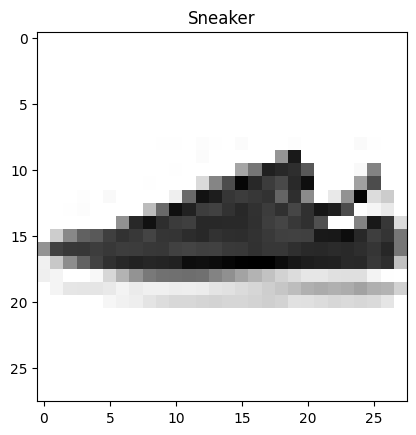

In [104]:
# plot to visual our dataset
plt.imshow(train_data[6],cmap = plt.cm.binary)
plt.title(class_names[train_label[6]]);
plt.show()

In [105]:
# lets create a function to view our images and their labels in the dataset
def view_image(train_images,class_labels,train_labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i],cmap = plt.cm.binary)
        plt.xlabel(class_labels[train_labels[i]])
    plt.show()

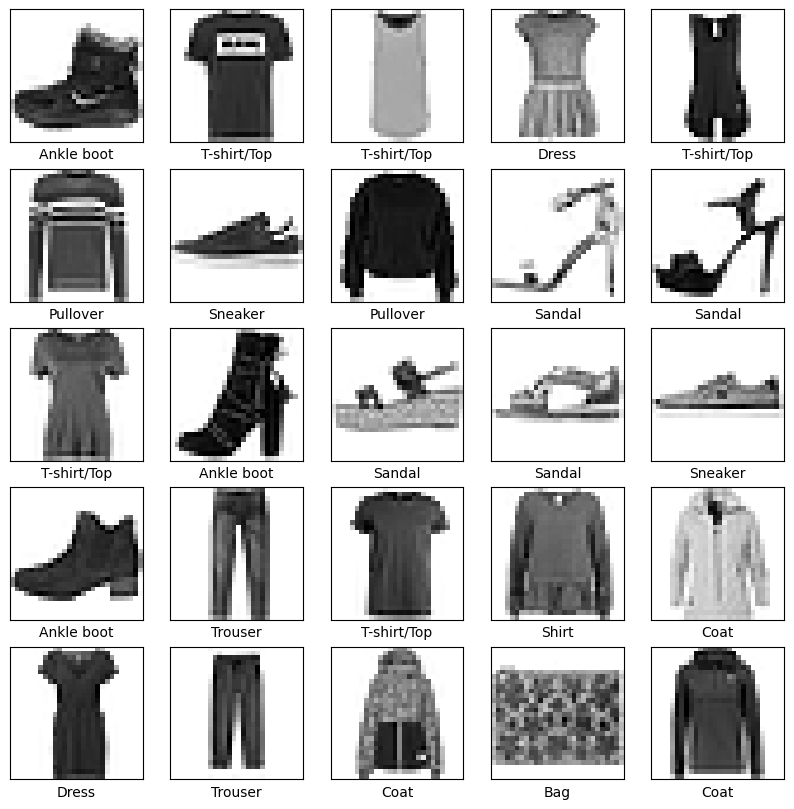

In [106]:
view_image(train_data,class_names,train_label)

In [89]:
# let's create a model 

tf.random.set_seed(42) # set random seed to avoid shuffling
model_1 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(10,activation="softmax")])

# compile the model
model_1.compile(loss="SparseCategoricalCrossentropy",optimizer="Adam",
               metrics=["accuracy"])
# fit the model
history_1 = model_1.fit(train_data,train_label,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1637 - accuracy: 0.1623
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7077 - accuracy: 0.2546
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6308 - accuracy: 0.2851
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6096 - accuracy: 0.2891
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.5956 - accuracy: 0.3022
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5877 - accuracy: 0.3145
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5753 - accuracy: 0.3232
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5719 - accuracy: 0.3232
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5754 - accuracy: 0.3215
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.569

In [107]:
# let us normalise our data(convert to 0 and 1 to improve the result)

train_data.max(), train_label.max(), test_data.max(),test_label.max()

(255, 9, 255, 9)

In [108]:
# divide through by the maximum value
train_data=train_data/255
train_data.max()

1.0

In [142]:
test_data=test_data/255
test_data.max()

1.0

In [109]:
# lets build our model 2 with normalised data
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(100,activation="relu"),
                              tf.keras.layers.Dense(10, activation="softmax")])

model_2.compile(loss = "SparseCategoricalCrossentropy",
               optimizer = "Adam",metrics=["accuracy"])

history_2 = model_2.fit(train_data,train_label,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5054 - accuracy: 0.8235
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3792 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3407 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3166 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2993 - accuracy: 0.8885
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2850 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2745 - accuracy: 0.8980
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2627 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2539 - accuracy: 0.9056
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.248

In [110]:
# normalisation has improved the performance of our model
# evaluate the accuracy

model_2.evaluate(test_data,test_label)

313/313 [==============================] - 1s 2ms/step - loss: 66.7244 - accuracy: 0.8533


[66.72440338134766, 0.8532999753952026]

In [111]:
# the difference between the train data and the test data is called the overfitting
# lets make predictions on our dataset

prob_model=model_2.predict(test_data)
prob_model

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [112]:
prob_model[5].argmax(),class_names[prob_model[5].argmax()]

(1, 'Trouser')

In [121]:
# lets visualize our predictions

def plot_image(i, prediction_array,true_label,img):
    true_label,img = true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction_array)
    
    if predicted_label == true_label:
        color = "green"
    else:
        color = "red"
    plt.xlabel("{}{:2.0f}%({})".format(class_names[predicted_label],
                                      100*np.max(prediction_array),
                                      class_names[true_label]),
              color=color)
        

In [122]:
def plot_value_array(i,prediction_array,true_label):
    true_label=true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10),prediction_array, color ="#7777")
    plt.ylim([0,1])
    predicted_label = np.argmax(prediction_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')
        

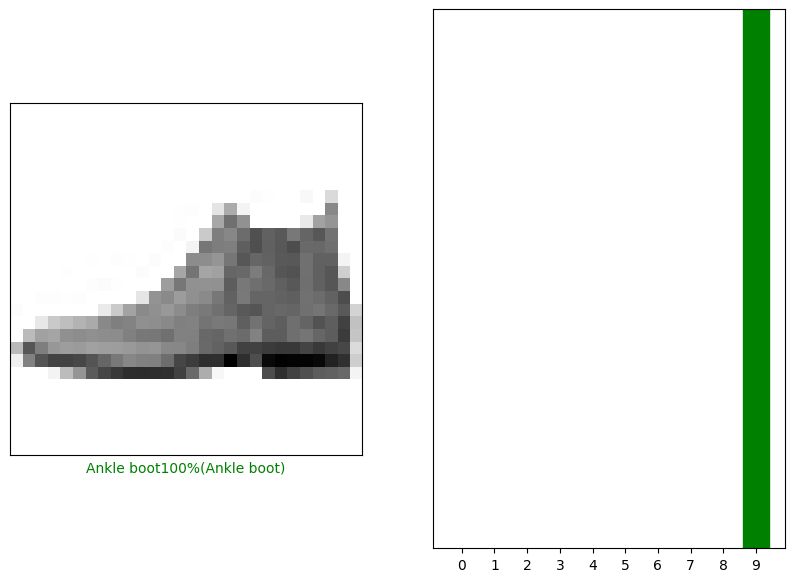

In [128]:
i=0
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plot_image(i,prob_model[i],test_label,test_data)
plt.subplot(1,2,2)
plot_value_array(i,prob_model[i],test_label)
plt.show();


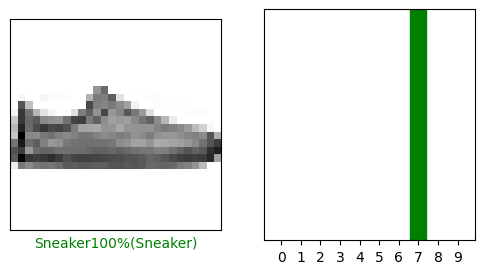

In [126]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prob_model[i], test_label, test_data)
plt.subplot(1,2,2)
plot_value_array(i, prob_model[i],  test_label)
plt.show()

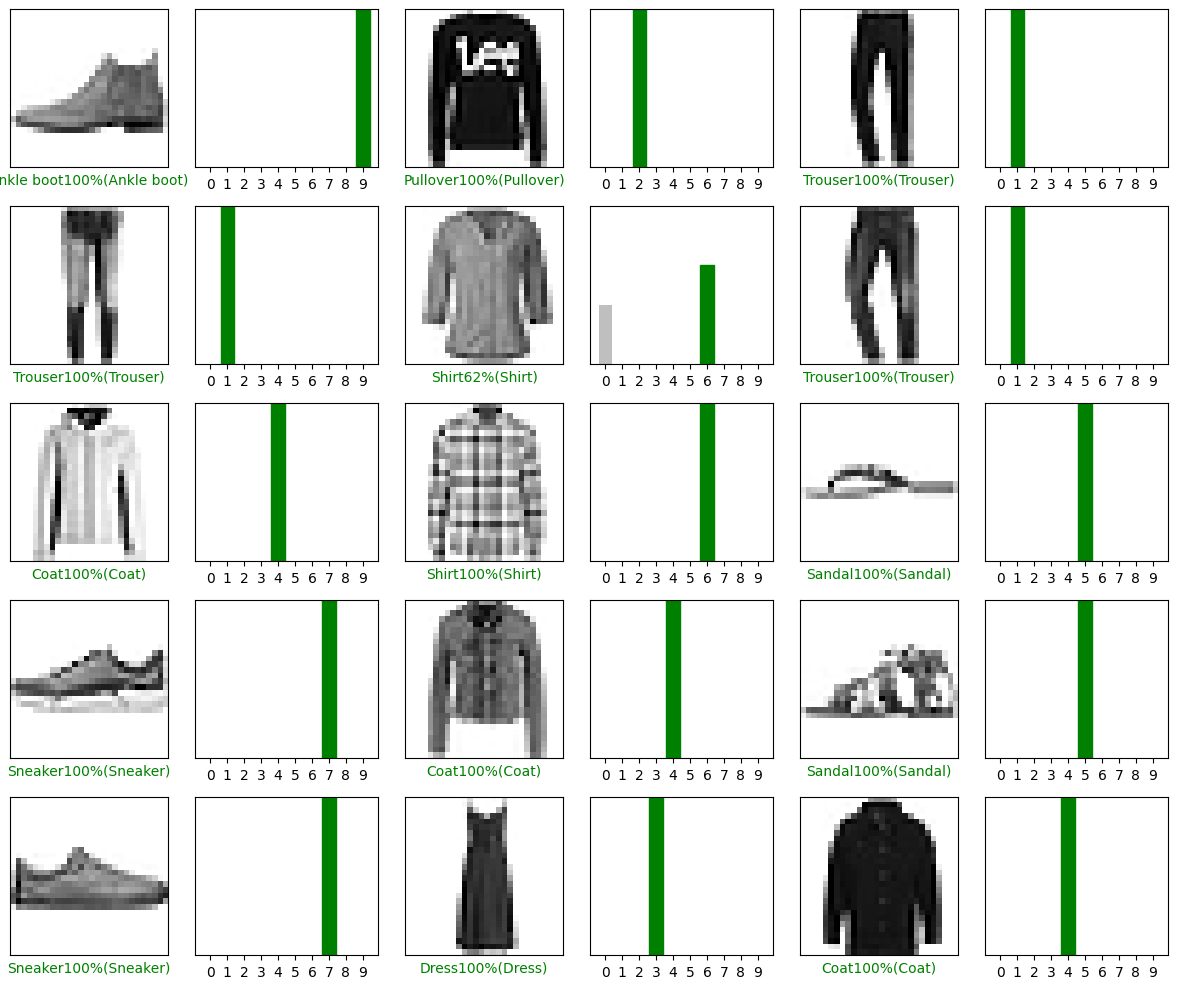

In [137]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols,2*i+1)
    plot_image(i,prob_model[i],test_label,test_data)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,prob_model[i],test_label)
plt.tight_layout()
plt.show()

# our model is able to get all predictions correctly